In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read data 

In [80]:
data = pd.read_csv('D:\FirstSemMT\ML\Assignments\cancer.csv')
# data.drop(data.columns.difference(['radius_mean','texture_mean']), 1, inplace=True)
data.drop(['id','diagnosis','Unnamed: 32'], axis = 1, inplace = True) 
data = data.values
samples,features = data.shape
print(samples,features)

569 30


####  Parameters 

In [81]:
eps=0.2
minpts=6

In [87]:
eps=0.5
minpts=6

In [93]:
eps=0.2
minpts=3

#### Distance calculation 

In [94]:
dist_matrix = np.zeros(((data).shape[0],(data).shape[0]))
for i in range(samples):
    for j in range(samples):
        dist_matrix[i,j] = np.sqrt(np.sum((data[i]-data[j])**2))

#### Neighbouring function 

In [95]:
def getNeighbours(x):
    neighbours = []
    for i in range(samples):
        if(dist_matrix[x][i]<=eps):
            neighbours.append(i)
    return neighbours

####  Form clusters by assigning core object and outliers

In [96]:
visited = np.zeros(samples)
num_visited=0
label = np.zeros(samples)
cluster=0
while(num_visited<samples):
    x = np.random.randint(samples, size=1)[0]
    if(visited[x]==0):
        visited[x]=1
        num_visited+=1
        neighbours = getNeighbours(x)
        if(len(neighbours)<minpts):
            label[x]=-1
        else:
            cluster+=1
            label[x]= cluster
            while(len(neighbours)>0):
                xdash = neighbours[0]
                neighbours.pop(0)
                if(visited[xdash]==0):
                    visited[xdash]=1
                    num_visited+=1
                    ndash = getNeighbours(xdash)
                    if(len(ndash)>=minpts):
                        for nn in ndash:
                            neighbours.append(nn)
                if(label[xdash]==0):
                    label[xdash]=cluster
            
# print(label)


#### Number of clusters and points in those clusters 

In [97]:
maxl = int(label.max())
print('Estimated number of clusters:', maxl)
for i in range(-1,maxl+1):
    if i==-1:
        print('Noise points:',np.where(label==i)[0].shape[0])
    elif i>0:
        print('no. of points in cluster',i,":",np.where(label==i)[0].shape[0])

Estimated number of clusters: -1
Noise points: 569


#### Scatter plot 

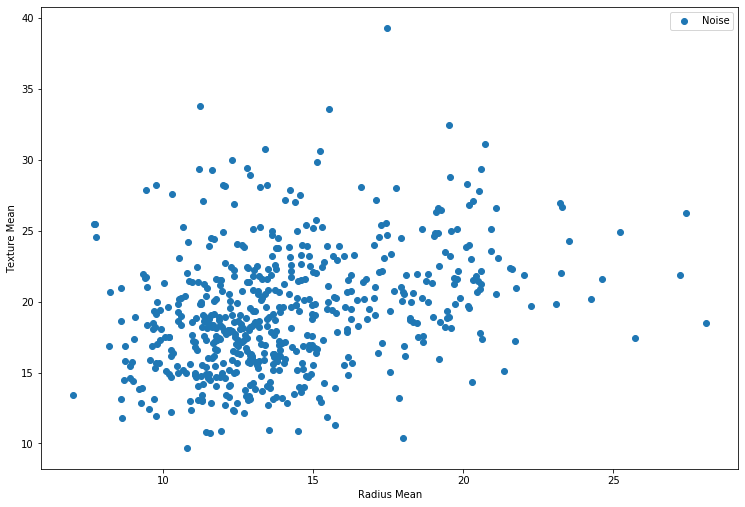

In [86]:
fig = plt.gcf()
for i in range(-1,maxl+1):
    if i==-1:
        plt.scatter(data[np.where(label==i)[0],0],data[np.where(label==i)[0],1],label='Noise')
    elif i>0:
        plt.scatter(data[np.where(label==i)[0],0],data[np.where(label==i)[0],1],label='Cluster '+str(i))
fig.set_size_inches(12.5, 8.5)
plt.legend()
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()

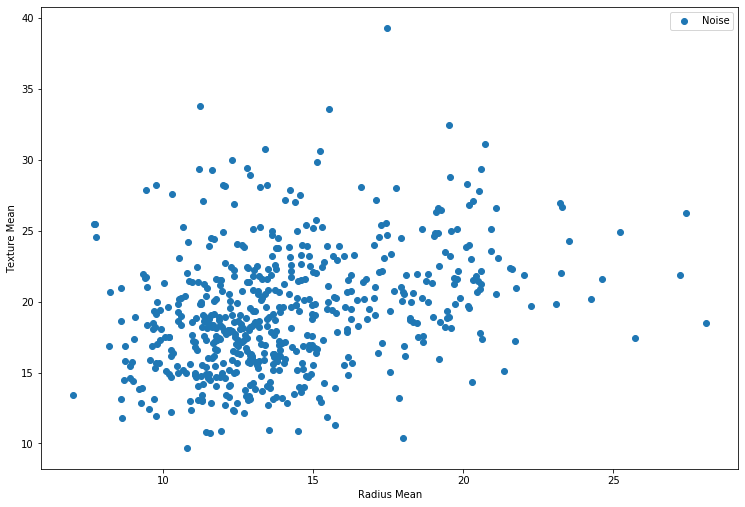

In [92]:
fig = plt.gcf()
for i in range(-1,maxl+1):
    if i==-1:
        plt.scatter(data[np.where(label==i)[0],0],data[np.where(label==i)[0],1],label='Noise')
    elif i>0:
        plt.scatter(data[np.where(label==i)[0],0],data[np.where(label==i)[0],1],label='Cluster '+str(i))
fig.set_size_inches(12.5, 8.5)
plt.legend()
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()

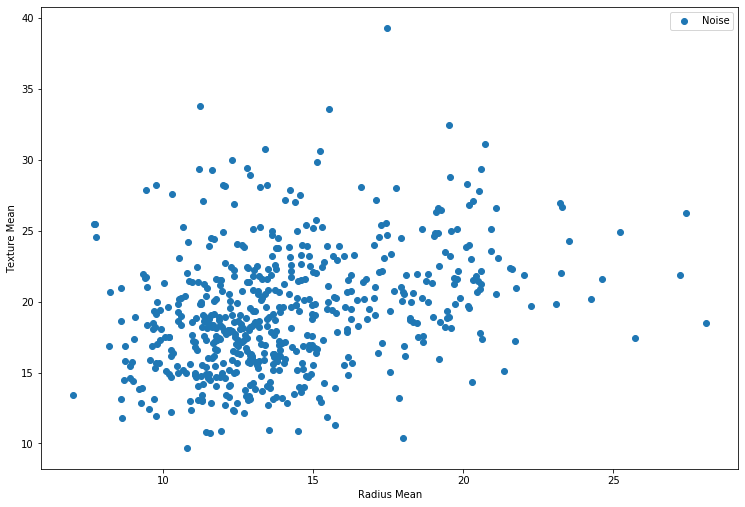

In [98]:
fig = plt.gcf()
for i in range(-1,maxl+1):
    if i==-1:
        plt.scatter(data[np.where(label==i)[0],0],data[np.where(label==i)[0],1],label='Noise')
    elif i>0:
        plt.scatter(data[np.where(label==i)[0],0],data[np.where(label==i)[0],1],label='Cluster '+str(i))
fig.set_size_inches(12.5, 8.5)
plt.legend()
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()

#### Observation :  

For a given parameter, There will not be any core points and border points. If we increase radius of circle (eps) then we will be able to see core points. This is helpful to find outliers in data set.When we increase radius, it will form more core points and noise points will be less. 